# Numerical differentiation: functions and arrays

The finite difference method for numerical differentiation is widely used, but it is important to understand two standard ways of applying it: first, for known functions, using two evaluations; second, for an array of values on a grid (using grid values only: we have used `np.roll` for efficiency).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Known functions

If we have a python function of a variable, say $x$, that allows us to evaluate some quantity, say $f$, as a function of any values of $x$, then we can use the standard definitions of finite differences, for instance:

$$\frac{df}{dx} \simeq \frac{f(x+\Delta x) - f(x)}{\Delta x}$$

for the forward difference, and write a python function to evaluate the gradient at a point $x$, as below. (Note that, of course, we could make $x$ an array of points, and so we would then receive an array of gradients.)

In [2]:
def evaluate_df_dx(f,x,dx):
    """Evaluate forward difference of function f at point x using step dx
    
    Inputs:
    f  Function to be differentiated
    x  Point at which to take gradient (can be numpy array)
    dx Step size to use for gradient
    
    Output:
    df_dx Forward difference
    """
    f_x = f(x)
    f_x_dx = f(x+dx)
    grad = (f_x_dx - f_x)/dx
    return grad

Why might we want to do this? An example would be any system where we have an energy which depends on a parameter in a complex fashion: we could not find the gradient analytically, but we could find it numerically in this way.  The key point here is that we can calculate the function for an *arbitrary* value of `x`.

As always, the accuracy is determined by the value we choose for $\Delta x$, and we can essentially choose any value that we want (though note that, as we explored, if it is too small there may be problems with rounding error).

## Unknown functions

In the case where we have some property of a physical system represented on a grid, but not as a known function, then we cannot use the approach above.  An example is the wavefunction in the Schrodinger solver I developed in an accompanying notebook: we have the values at discrete points only.  In this case, we use the values of the function *on the grid* to evaluate the differentials:

$$\frac{df}{dx}(x_i) \simeq \frac{f(x_{i+1}) - f(x_{i})}{\Delta x}$$

where we assume that $x_i = x_0 + i\times \Delta x$.  In this case, the value of $\Delta x$ is set by the grid that we have defined, and any refinement will increase the total cost of the calculation (in contrast to the situation above).  For any numerical optimisation that involves values on a grid, this is the only way to find derivatives.

In [3]:
def evaluate_df_dx_grid(f,dx):
    """Forward finite difference for array of function values on a grid, spacing dx
    
    In this case, we set the boundary value to zero (for the final value)
    
    Inputs:
    f  Array of values
    dx Grid spacing
    
    Output:
    df_dx Array of gradients
    """
    # Slow approach
    df_dx = np.zeros_like(f)
    for i in range(len(f)-1):
        df_dx[i] = (f[i+1] - f[i])/dx
    # Fast approach
    f_p = np.roll(f,-1)
    df_dx = (f_p - f)/dx
    df_dx[-1] = 0.0
    return df_dx

## Known function demonstration

In [4]:
# Demonstrate known function
dx = np.logspace(-1,-5,5)
x = 1.0
# We will use sine as our function
sin_diff_dx = evaluate_df_dx(np.sin,x,dx)

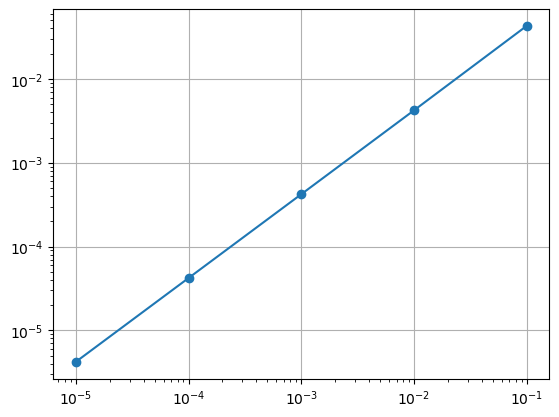

In [8]:
plt.loglog(dx,np.abs(sin_diff_dx - np.cos(x)),'o-')
plt.grid()

In [20]:
x_vals = np.linspace(0,2*np.pi,11)
this_dx = 1e-3
sin_diff_array = evaluate_df_dx(np.sin,x_vals,this_dx)

Text(0.5, 1.0, 'Test for finite difference with dx=0.001')

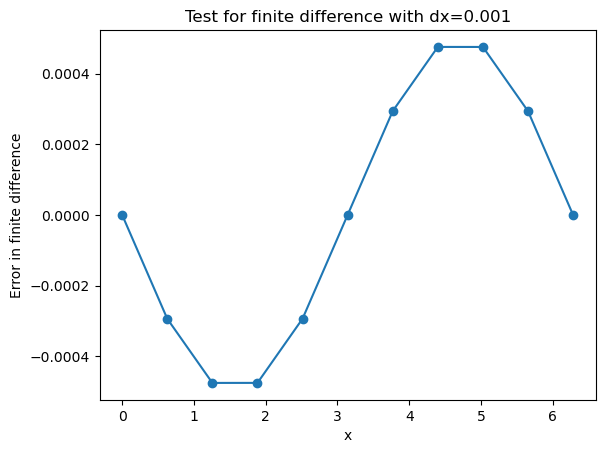

In [21]:
plt.plot(x_vals,sin_diff_array-np.cos(x_vals),'o-')
plt.xlabel('x')
plt.ylabel('Error in finite difference')
plt.title(f'Test for finite difference with dx={this_dx}')

## Grid-based approach demonstration

In [17]:
# Demonstrate array
N_large = 61
x_vals_large_dx = np.linspace(0,2*np.pi,N_large)
dx_large = 2*np.pi/(N_large-1)
print(f"Large spacing is {dx_large}")
test_array_large_dx = np.sin(x_vals_large_dx)
grid_diff_large_dx = evaluate_df_dx_grid(test_array_large_dx,dx_large)
N_small = 6001
x_vals_small_dx = np.linspace(0,2*np.pi,N_small)
dx_small = 2*np.pi/(N_small-1)
print(f"Small spacing is {dx_small}")
test_array_small_dx = np.sin(x_vals_small_dx)
grid_diff_small_dx = evaluate_df_dx_grid(test_array_small_dx,dx_small)

Large spacing is 0.10471975511965977
Small spacing is 0.0010471975511965976


Text(0.5, 1.0, 'Error of finite difference for array')

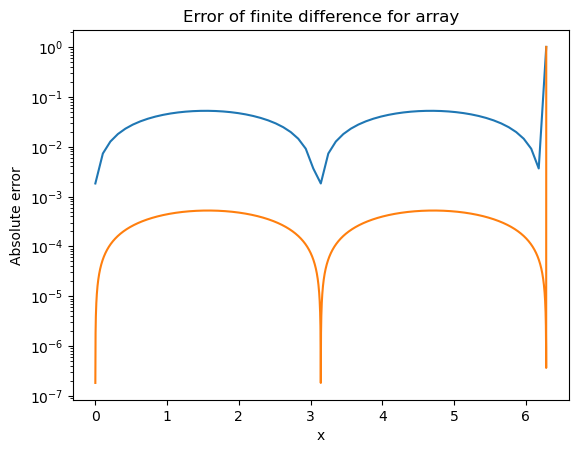

In [19]:
plt.semilogy(x_vals_large_dx,np.abs(grid_diff_large_dx-np.cos(x_vals_large_dx)))
plt.semilogy(x_vals_small_dx,np.abs(grid_diff_small_dx-np.cos(x_vals_small_dx)))
plt.ylabel('Absolute error')
plt.xlabel('x')
plt.title('Error of finite difference for array')